In [32]:
# Imports
#%matplotlib qt
%matplotlib inline

import matplotlib.pyplot as plt
import mne
import os
import numpy as np
from scipy.stats import pearsonr
from fooof import FOOOF

In [2]:
# Set up paths

# This base path will need updating
base_path = '/Users/luyandamdanda/Documents/Research/EEG_Dat'

# These should stay the same
#subj_dat_fname = '._3502_resampled.set'
subj_dat_fname = '3503_resampled.set'

In [3]:
# Read in subject listed above

ev_dict = {'Start Block': 1001., 'End Block': 1002., 'Start Labelling Block':1003., 'End Labelling Block':1004}
# event dictionary to ensure "Start Block" and "End Block"

full_path = os.path.join(base_path, subj_dat_fname)
eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)

Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
2290/3022 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
Reading /Users/luyandamdanda/Documents/Research/EEG_Dat/3503_resampled.fdt


<ipython-input-3-693e87f92b96>:7: RuntimeWarning: Events like the following will be dropped entirely: ['Sham_Pres_threshold', 'Peak_Pres_thresh', 'Label_Undetected_thresh', 'SPACE pressed', 'Sham_Pres_sham'], 37 in total
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)
<ipython-input-3-693e87f92b96>:7: RuntimeWarning: 2290/3022 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  eeg_dat = mne.io.read_raw_eeglab(full_path, event_id=ev_dict)


In [4]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 250.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 16:00:00
    nchan : int | 65
    projs : list | 0 items
    sfreq : float | 500.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : No

In [5]:
eeg_dat.set_eeg_reference()
# set EEG average reference

Adding average EEG reference projection.
1 projection items deactivated


<RawEEGLAB  |  3503_resampled.fdt, n_channels x n_times : 65 x 1824011 (3648.0 sec), ~140 kB, data not loaded>

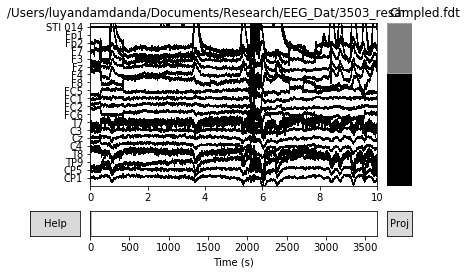

In [8]:
eeg_dat.plot();

In [9]:
# identifying all the events and IDs
mne.find_events(eeg_dat);

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]


In [10]:
events = mne.find_events(eeg_dat)
event_id = {'Start Labelling Block':1003}

epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Rest Events")

368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]
name is deprecated and will be removed in 0.15.
2 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-10-c52714de46dc>:4: RuntimeWarning: name is deprecated and will be removed in 0.15.
  epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, name = "Epochs created on Start and End Rest Events")


Loading data for 2 events and 351 original time points ...
0 bad epochs dropped
Loading data for 2 events and 351 original time points ...


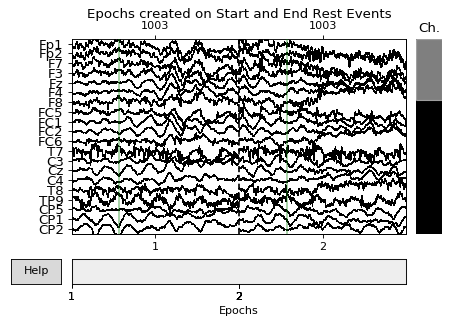

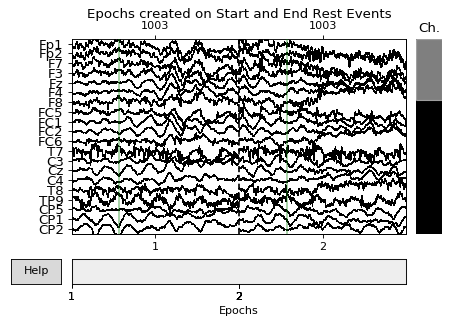

In [11]:
epochs.plot()

# Marking bad channels
### Based on visualization.


In [12]:
eeg_dat.info['bads'] = ['TP9']

In [13]:
print('Bad channels: ', eeg_dat.info['bads'])

('Bad channels: ', ['TP9'])


368 events found
Events id: [   1    3    5    9   10 1001 1002 1003 1004]
Found %s events.
()
event 1 missing from event_id will be ignored
event 3 missing from event_id will be ignored
event 5 missing from event_id will be ignored
event 9 missing from event_id will be ignored
event 10 missing from event_id will be ignored
event 1001 missing from event_id will be ignored
event 1002 missing from event_id will be ignored
event 1004 missing from event_id will be ignored


<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 1 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 3 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 9 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 10 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 1001 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 1002 missing from event_id will be ignored
  event_id=event_id)
<ipython-input-14-258898793aa5>:12: RuntimeWarning: event 1004 missing from event_id will be ignored
  event_id=event_id)


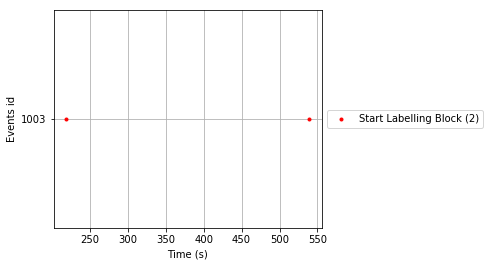

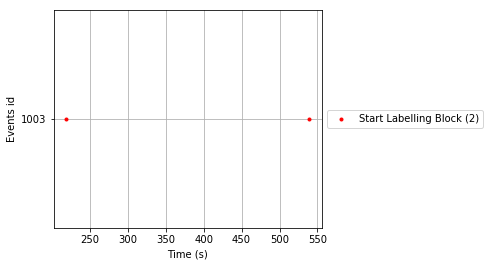

In [14]:
events = mne.find_events(eeg_dat)
print('Found %s events.')
print()

# Plot the events to get an idea of the paradigm
# Specify colors and an event_id dictionary for the legend.
# Plotting only Start and Rest Block events
event_id = {'Start Labelling Block':1003}
color = {1003:'red'}

mne.viz.plot_events(events, eeg_dat.info['sfreq'], eeg_dat.first_samp, color=color,
                    event_id=event_id)

# Marking bad moments
### Identifying bad moments based on visualization

In [15]:
# Not to critical for this data

In [16]:
epochs = mne.Epochs(eeg_dat, events=events, event_id=event_id, tmin = 5, tmax = 125,
                    baseline = None, name = "Epochs created on Start and End Rest Events")

name is deprecated and will be removed in 0.15.
2 matching events found
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<ipython-input-16-40f0dbcdb9cf>:2: RuntimeWarning: name is deprecated and will be removed in 0.15.
  baseline = None, name = "Epochs created on Start and End Rest Events")


In [17]:
chs = mne.channels.read_montage('standard_1020', epochs.ch_names[:-1])
epochs.set_montage(chs)

<Epochs  |  n_events : 2 (good & bad), tmin : 5.0 (s), tmax : 125.0 (s), baseline : None, ~143 kB, data not loaded>

In [18]:
epochs.drop_bad()

Loading data for 2 events and 60001 original time points ...
0 bad epochs dropped


<Epochs  |  n_events : 2 (all good), tmin : 5.0 (s), tmax : 125.0 (s), baseline : None, ~143 kB, data not loaded>

Loading data for 2 events and 60001 original time points ...


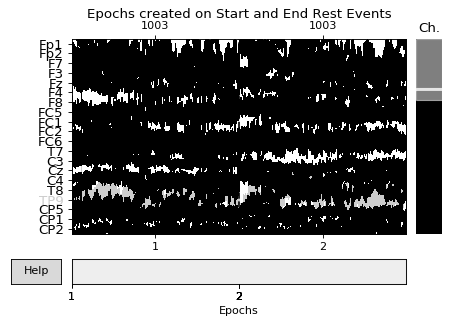

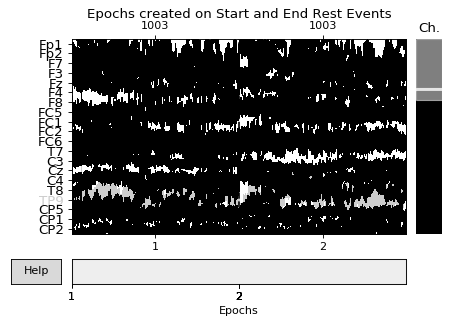

In [19]:
epochs.plot()

Loading data for 2 events and 60001 original time points ...


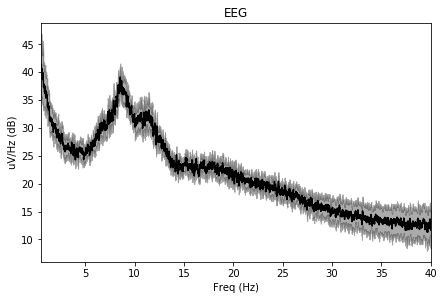

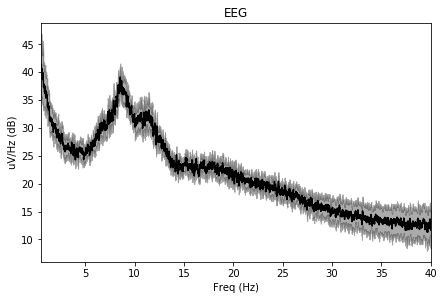

In [20]:
epochs.plot_psd(fmin = 0.5, fmax = 40)

In [21]:
# Calculate PSDs
psds, freqs = mne.time_frequency.psd_welch(epochs, fmin=3., fmax=40., n_fft=500)

# Average PSDs for each channel across each rest block
avg_psds = np.mean(psds, axis=0)

Loading data for 2 events and 60001 original time points ...
Effective window size : 1.000 (s)


In [22]:
avg_psds.shape

(63, 38)

In [23]:
freqs.shape

(38,)

In [24]:
psds.shape

(2, 63, 38)

In [25]:
# Get freq res of PSD
f_res = np.mean(np.diff(freqs))

In [26]:
plt.plot(freqs, np.log10(psds[1, 30, :]))

# FOOOFing Data

In [27]:
import scipy

In [28]:
scipy.__version__

'0.19.1'

In [29]:
fooof_psds = np.squeeze(psds[0,:,:])

In [30]:
fooof_psds.shape

(63, 38)

('\nFOOOF WARNING: Lower-bound Bandwidth limit is ~= the frequency resolution. \n', '  This may lead to overfitting of small bandwidth oscillations.\n')
('====================================================================================================', '\n')
('                                          FOOOF - PSD MODEL                                         ', '\n')
                      The input PSD was modeled in the frequency range 2-40 Hz                      
                                 Frequency Resolution is 1.00 Hz 
                                  
                              Background Parameters (offset, slope):                                
                                          -10.8461, 1.6678                                          
('\n', '                                     3 oscillations were found:                                     ')
                                 CF:   8.62, Amp:  1.671, BW:  2.74                                 
         

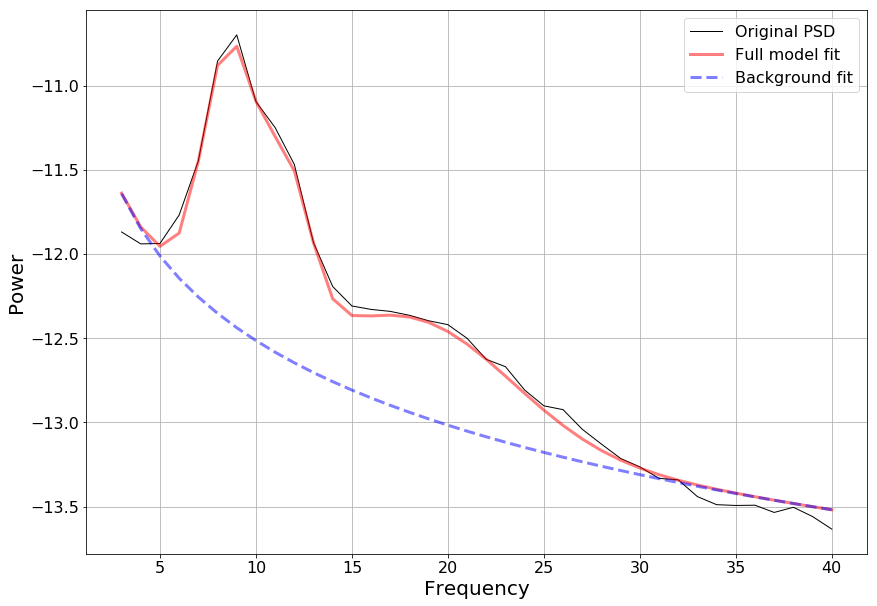

In [42]:
# Initialzing FOOOF model
fm = FOOOF()

# Setting frequency range
freq_range = [2, 40]

fm.model(freqs, fooof_psds[22 , :], freq_range)

In [37]:
a, b, c, d = fm.get_params()

In [39]:
b.shape

(2, 3)

In [ ]:
# Settings for FOOOF
min_p = 0.2
freq_res = np.mean(np.diff(freqs))
foof = FOOF(freqs, res=freq_res, min_p=min_p)
#psd = np.reshape(avg_psds[50, :], [len(freqs), 1])
psd = np.reshape(psds[0, 10, :], [len(freqs), 1])
foof.fit(psd)

In [ ]:
# Check FOOF outputs:
# foof_dat is [slope_val, [center frequencies], [oscillation powers], [oscillation bandwidths]]
foof_dat

In [ ]:
type(foof_dat)

In [ ]:
foofresults = []
for i in range (psds.shape[1]):
    psd = np.reshape(psds[0, i, :], [len(freqs), 1])
    foof.fit(psd)
    # Extract foof fit data
    foof_dat = (foof.chi_, foof.centers_, foof.powers_, foof.stdevs_)
 

In [ ]:
print(foofresults)

Slope should be less than 2

In [ ]:
print(foofresults[1])

In [ ]:
f_res = foofresults[0]

In [44]:
# Define our oscillation bands
bands = [['Theta', [4, 8]], ['Alpha', [8, 12]]]

# Initialize output object
outs = dict()
for band in bands:
    outs[band[0]] = []

In [45]:
# Pull out oscillation band data
for fooof_result in fooof_results:
    
    for band in bands:
        
        cur_psd_osc_in_band = get_band_osc(fooof_result['oscillation_params'], band[1])

{'Alpha': [], 'Theta': []}

In [23]:
# NOTE:
def get_band_osc(osc_params, band_def, ret_one=True):
    """Searches for a given band of interest within a list of oscillation
    
    Parameters
    ----------
    osc_params : 2d array
        Oscillations parameters, from FOOOF. [n_oscs, 3] 
    band_def : [float, float]
        Defines the band of interest
    ret_one : bool
        Whether to return single oscillation (or all found)
        
    Return
    ---------
    osc_out : array
        Osc data, form - (centers, powers, bws, # oscillations).  
    """
    
    # Catch & return if empty
    if not osc_params:
        return [np.nan, np.nan, np.nan]
    
    # Find indices of oscillations in the specified range
    osc_inds = (osc_params[:, 0] >= band_def[0]) & (osc_params[:, 0] <= band_def[1])
    
    # Gets the number of oscillations within the specified range
    n_oscs = sum(osc_inds)
    
    # If there are no 
    if n_oscs == 0:
        return np.array([np.nan, np.nan, np.nan])
    
    band_oscs = osc_params[osc_inds, :]

    # If results > 1 and ret_one, then we return the highest power oscillation
    #    Call a sub-function to select highest power oscillation
    #.   Note: see omegamappin/om/meg/single.py - _get_single_osc_power function. 
    if n_oscs > 1 and ret_one:
        # Get highest power oscillation in band
        band_oscs = get_highest_power_osc(band_oscs)
    
    # If results == 1, return osc - [cen, power, bw]
    return band_oscs


In [19]:
def get_highest_power_osc(band_oscs):
    """Searches for the highest power oscillation within a band of interest
    
    Parameters
    ----------
    osc_params : 2d array
        Oscillations parameters, from FOOOF. [n_oscs, 3] 
        
    Return
    ---------
    band_oscs : array
        Osc data, form - (centers, powers, bws, # oscillations).  
    """
    # Catch & return if empty
    if not osc_params:
        return [np.nan, np.nan, np.nan]
    
    high_ind = np.argmax(band_oscs[:, 1])
    return band_oscs[high_ind, :]
    